In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [5]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
df = pd.read_csv("Symptom2Disease.csv")
df.head()

,Unnamed: 0,label,text
0,0,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and..."


In [7]:
df.shape

(1200, 3)

In [8]:
df.drop("Unnamed: 0",axis=1)

,label,text
0,Psoriasis,I have been experiencing a skin rash on my arm...
1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,Psoriasis,I have been experiencing joint pain in my fing...
3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,Psoriasis,"My nails have small dents or pits in them, and..."
...,...,...
1195,diabetes,I'm shaking and trembling all over. I've lost ...
1196,diabetes,"Particularly in the crevices of my skin, I hav..."
1197,diabetes,I regularly experience these intense urges and...
1198,diabetes,"I have trouble breathing, especially outside. ..."


In [9]:
df["label"].value_counts()

Psoriasis                          50
Varicose Veins                     50
peptic ulcer disease               50
drug reaction                      50
gastroesophageal reflux disease    50
allergy                            50
urinary tract infection            50
Malaria                            50
Jaundice                           50
Cervical spondylosis               50
Migraine                           50
Hypertension                       50
Bronchial Asthma                   50
Acne                               50
Arthritis                          50
Dimorphic Hemorrhoids              50
Pneumonia                          50
Common Cold                        50
Fungal infection                   50
Dengue                             50
Impetigo                           50
Chicken pox                        50
Typhoid                            50
diabetes                           50
Name: label, dtype: int64

##Stemming

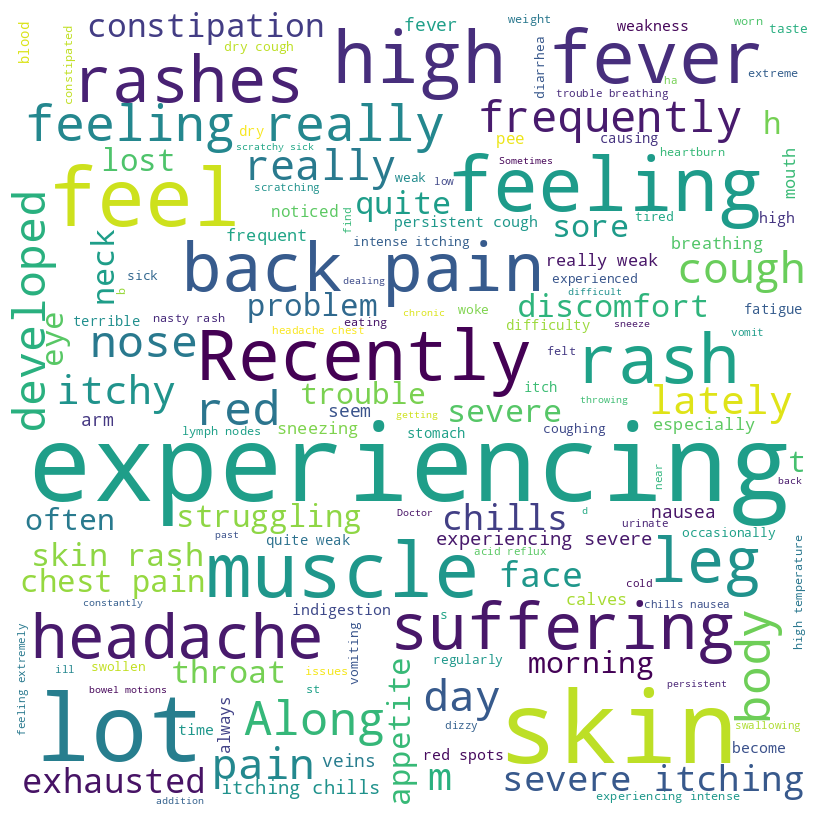

In [10]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
data = df
text_data = data['text'].to_string(index=False)

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text_data)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

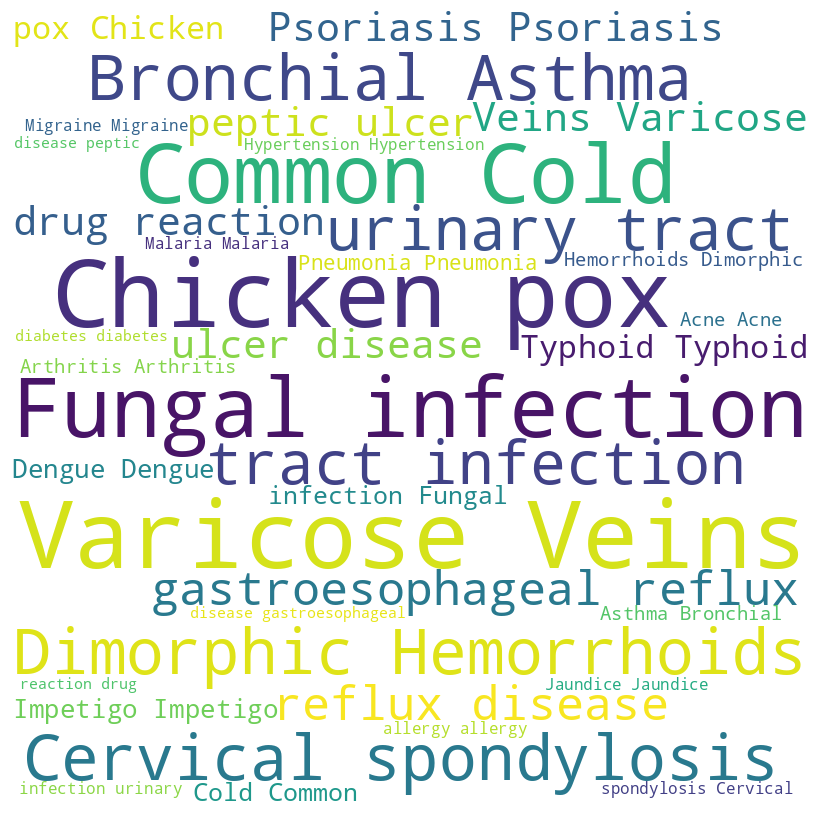

In [43]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
data = df
text_data = data['label'].to_string(index=False)

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text_data)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


##Lemmitization

In [12]:
lem= WordNetLemmatizer()

In [13]:
lem= WordNetLemmatizer()
corpus2 = []
for i in range(0,len(df)):
  review = re.sub("[^a-zA-Z]"," ",df["text"][i])
  review = review.lower()
  review = review.split()
  review = [lem.lemmatize(word) for word in review if not word  in set(stopwords.words("english"))]
  review = " ".join(review)

  corpus2.append(review)

In [15]:
corpus2[:5]

['experiencing skin rash arm leg torso past week red itchy covered dry scaly patch',
 'skin peeling especially knee elbow scalp peeling often accompanied burning stinging sensation',
 'experiencing joint pain finger wrist knee pain often achy throbbing get worse move joint',
 'silver like dusting skin especially lower back scalp dusting made small scale flake easily scratch',
 'nail small dent pit often feel inflammatory tender touch even minor rash arm']

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(ngram_range=(1,2),max_features=200)
x = cv.fit_transform(corpus2).toarray()

In [17]:
import pickle

In [18]:
pickle.dump(cv, open('tranform.pkl', 'wb'))

In [19]:
x[1]

array([0.        , 0.56420033, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.57135498, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [20]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(df["label"])

In [21]:
pickle.dump(le, open('le.pkl', 'wb'))

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=0)

In [23]:
x_train.shape,y_train.shape

((840, 200), (840,))

In [24]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [25]:
model.score(x_train,y_train)

0.9476190476190476

In [26]:
model.score(x_test,y_test)

0.8722222222222222

In [27]:
model.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}

In [28]:
pickle.dump(model, open('naiveb.pkl', 'wb'))

In [29]:
from sklearn.svm import SVC
model2 = SVC()
model2.fit(x_train,y_train)

SVC()

In [30]:
model2.score(x_train,y_train)

0.9988095238095238

In [31]:
model2.score(x_test,y_test)

0.9194444444444444

In [32]:
pickle.dump(model2, open('svc.pkl', 'wb'))

In [33]:
def predict_disease(symptoms):
    # Transform the new sentence using the same TfidfVectorizer
    sentence_transformed = cv.transform([symptoms]).toarray()
    prediction = model.predict(sentence_transformed)
    predicted_label = le.inverse_transform(prediction)[0]

    return predicted_label

In [34]:
corpus2[:5]

['experiencing skin rash arm leg torso past week red itchy covered dry scaly patch',
 'skin peeling especially knee elbow scalp peeling often accompanied burning stinging sensation',
 'experiencing joint pain finger wrist knee pain often achy throbbing get worse move joint',
 'silver like dusting skin especially lower back scalp dusting made small scale flake easily scratch',
 'nail small dent pit often feel inflammatory tender touch even minor rash arm']

In [35]:
predict_disease("skin peeling especially knee elbow scalp peeling often accompanied burning stinging sensation")

'Psoriasis'

In [36]:
predict_disease("nail small dent pit often feel inflammatory tender touch even minor rash arm")

'Psoriasis'

In [37]:
predict_disease("Trouble sleeping caused by shortness of breath, coughing or wheezing.")

'Pneumonia'

In [38]:
predict_disease("Rapid breathing: Breathing faster than normal, also known as tachypnea.")

'Bronchial Asthma'

In [39]:
predict_disease("Red, raised, and inflamed patches of skin: These patches may be covered with silvery scales, and can appear anywhere on the body, but are most common on the elbows, knees, scalp, and lower back.")

'Psoriasis'

In [40]:
predict_disease("Mucus dripping down your throat")

'Pneumonia'

In [41]:
predict_disease("Aches and pains (eye pain, typically behind the eyes, muscle, joint, or bone pain).")

'Dengue'